# EDA - October

### Work Related:

"In the last case (after deduplication), there are 67,024 rows and 1 column in the first 
dataset (2021-10-21 and 2021-10-28). The second dataset (2021-10-28 and 2021-11-04) has 262,561 rows and 1 column."

First one covers one week before 28/10, while the other one cover 28/10 inclusive one week ahead.

Total: 329.585

Agrah, O. Aydin, O. Tweet Classification and Sentiment Analysis on 
Metaverse Related Messages (2021). Journal of Metaverse, 2021. v. 1, p. 25-30.

In [1]:
import pandas as pd
import glob

In [3]:
cols=[
    'datetime',
    'tweet_id',
    'text',
    'language',
    'like_count',
    'rt_count',
    'reply_to',
    'retweeted',
    'user_id',
    'username',
    'user_followers',
    'user_fav_count',
    'is_verified',
    'created_at'
]

In [ ]:
# df = pd.DataFrame(columns=cols)
# frame = pd.DataFrame(columns=cols)

In [ ]:
path = r"C:\Users\wferreira.MPAC\OneDrive\TCC II - Metaverso - Este Sim Agora Vai\workspace\twitter-EDA\tweets_data_for_EDA"
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, names=cols, on_bad_lines='skip')
    li.append(df)

frame = pd.concat(li)

In [ ]:
df = frame

In [ ]:
df.info()

In [ ]:
#df = pd.read_csv(r"C:\Users\wferreira.MPAC\OneDrive\TCC II - Metaverso - Este Sim Agora Vai\workspace\twitter-EDA\tweets_data_for_EDA\*.csv", names=cols)

##### Preprocessing

In [ ]:
# Check number of duplicates by id and text
id_duplicates = df.drop(labels=["tweet_id"], axis=1).duplicated().sum()
text_duplicates = df.drop(labels=["text"], axis=1).duplicated().sum()

print(f"You seem to have {id_duplicates} duplicates tweet_id in your database.\n \
You seem to have {text_duplicates} duplicates text in your database.")

In [ ]:
# Drop all duplicated rows
df.drop_duplicates("tweet_id", inplace=True)
df.drop_duplicates("text", inplace=True)
df.shape

In [ ]:
# ordering data
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values(by="datetime")
df.head()

In [ ]:
df[['datetime','text']].head()

In [ ]:
# transform text in unicode escape to unicode
df['text'] = df.apply(lambda row: eval(row['text']).decode('utf-8'), axis=1)
df[['datetime','text']].head()

In [4]:
# save pre_processed file
#df.to_csv(r"C:\Users\wferreira.MPAC\OneDrive\TCC II - Metaverso - Este Sim Agora Vai\workspace\twitter-EDA\tweets_preprocessing\tweets_preprocessed.csv")
#df = pd.read_csv(r"C:\\Users\\wferreira.MPAC\\OneDrive\\TCC II - Metaverso - Este Sim Agora Vai\\workspace\\twitter-EDA\\tweets_preprocessing\\tweets_preprocessed_english.csv")
df = pd.read_csv(r"C:\\Users\\wferreira.MPAC\\OneDrive\\TCC II - Metaverso - Este Sim Agora Vai\\workspace\\twitter-EDA\\tweets_preprocessing\\tweets_preprocessed.csv")

In [5]:
df = df[['datetime', 'tweet_id', 'text',
       'language', 'like_count', 'rt_count', 'reply_to', 'retweeted',
       'user_id', 'username', 'user_followers', 'user_fav_count',
       'is_verified', 'created_at']]

In [6]:
df.head()

,datetime,tweet_id,text,language,like_count,rt_count,reply_to,retweeted,user_id,username,user_followers,user_fav_count,is_verified,created_at
0,2021-10-01 00:12:02+00:00,1443730389986590720,✨Join me this Sunday to celebrate 6 months sin...,en,17,8,NaN,NaN,358455054,BoxheadTweets,3724,13569,False,2011-08-19 23:28:07+00:00
1,2021-10-01 00:13:00+00:00,1443730633360953344,@top7ico @MXCfoundation @DeFinePlatform @YOPfi...,en,0,0,https://twitter.com/top7ico,NaN,2587108380,deenguyen0102,13,613,False,2014-06-25 08:29:47+00:00
2,2021-10-01 00:13:09+00:00,1443730669419446291,@MetaSpatial_io Good project go to the moon 🚀🚀...,en,1,0,https://twitter.com/MetaSpatial_io,NaN,1400522316686106624,alucard_aluca,12,366,False,2021-06-03 18:38:50+00:00
3,2021-10-01 00:13:18+00:00,1443730706409033728,@Metaverse_Yin I just take the hype as alpha lol,en,3,0,https://twitter.com/Metaverse_Yin,NaN,1350207215131525121,Paperhands41,868,3463,False,2021-01-15 22:24:29+00:00
4,2021-10-01 00:13:56+00:00,1443730867797565442,@Metaverse_Yin Keep it coming ! Lmao,en,4,0,https://twitter.com/Metaverse_Yin,NaN,1096134862484983808,BigLouGutter,4701,46924,False,2019-02-14 19:51:31+00:00


In [7]:
df.columns

Index(['datetime', 'tweet_id', 'text', 'language', 'like_count', 'rt_count',
       'reply_to', 'retweeted', 'user_id', 'username', 'user_followers',
       'user_fav_count', 'is_verified', 'created_at'],
      dtype='object')

In [8]:
pd.value_counts(df.dtypes)

object     6
int64      6
float64    1
bool       1
dtype: int64

### Structure of non-numerical features

In [ ]:
df.describe(exclude="number", datetime_is_numeric=True)

In [ ]:
# How much of these data is in english lang
df[df['language'] == 'en'].count()

### Structure of numerical features

In [ ]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

### Missing values

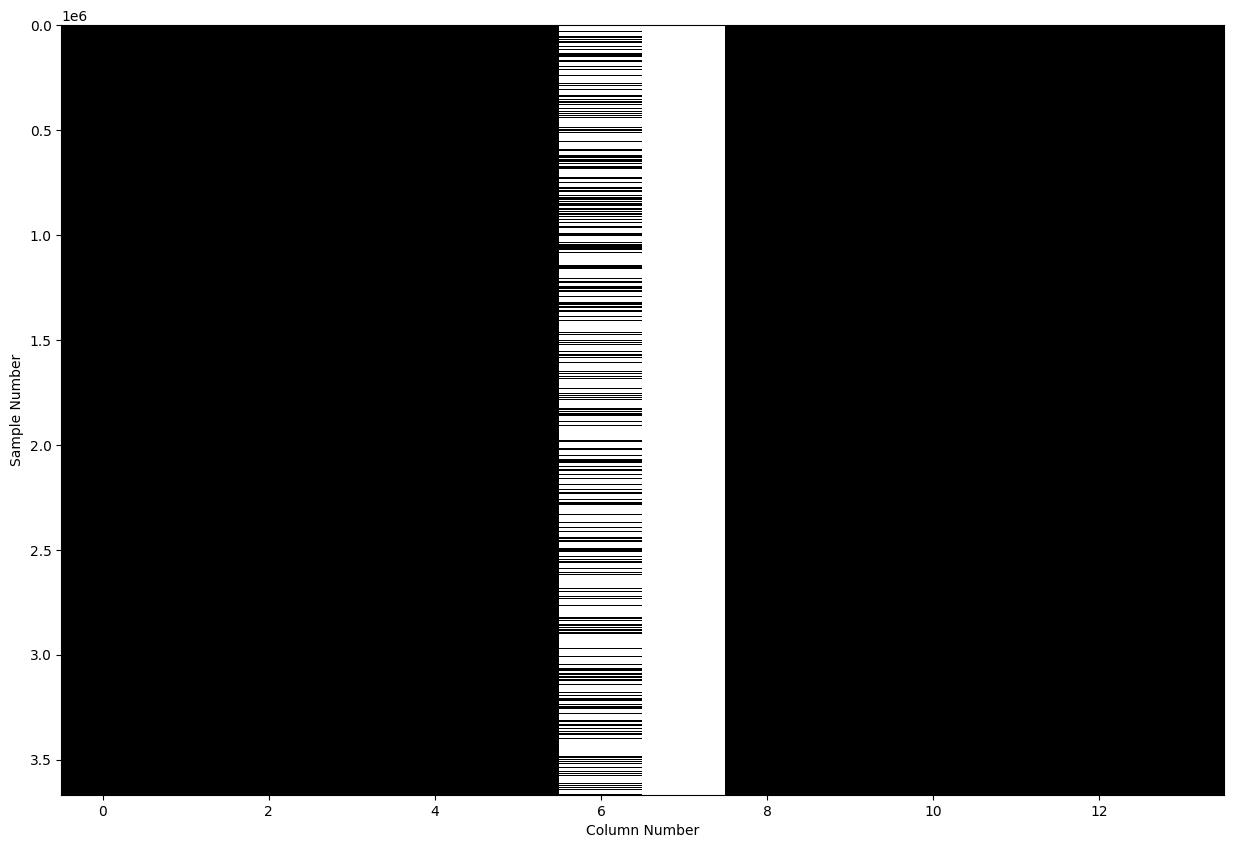

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.plot(color='#1d405d')
plt.savefig("figure.eps")
plt.show()

# kind='barh', 
# figsize=(5,5), 
# xlabel='Language', 
# ylabel='Number of tweets',
# edgecolor='#333F4B',
# linewidth=0.8,
# color='#1d405d'

Por que foram usados essas ferramentas

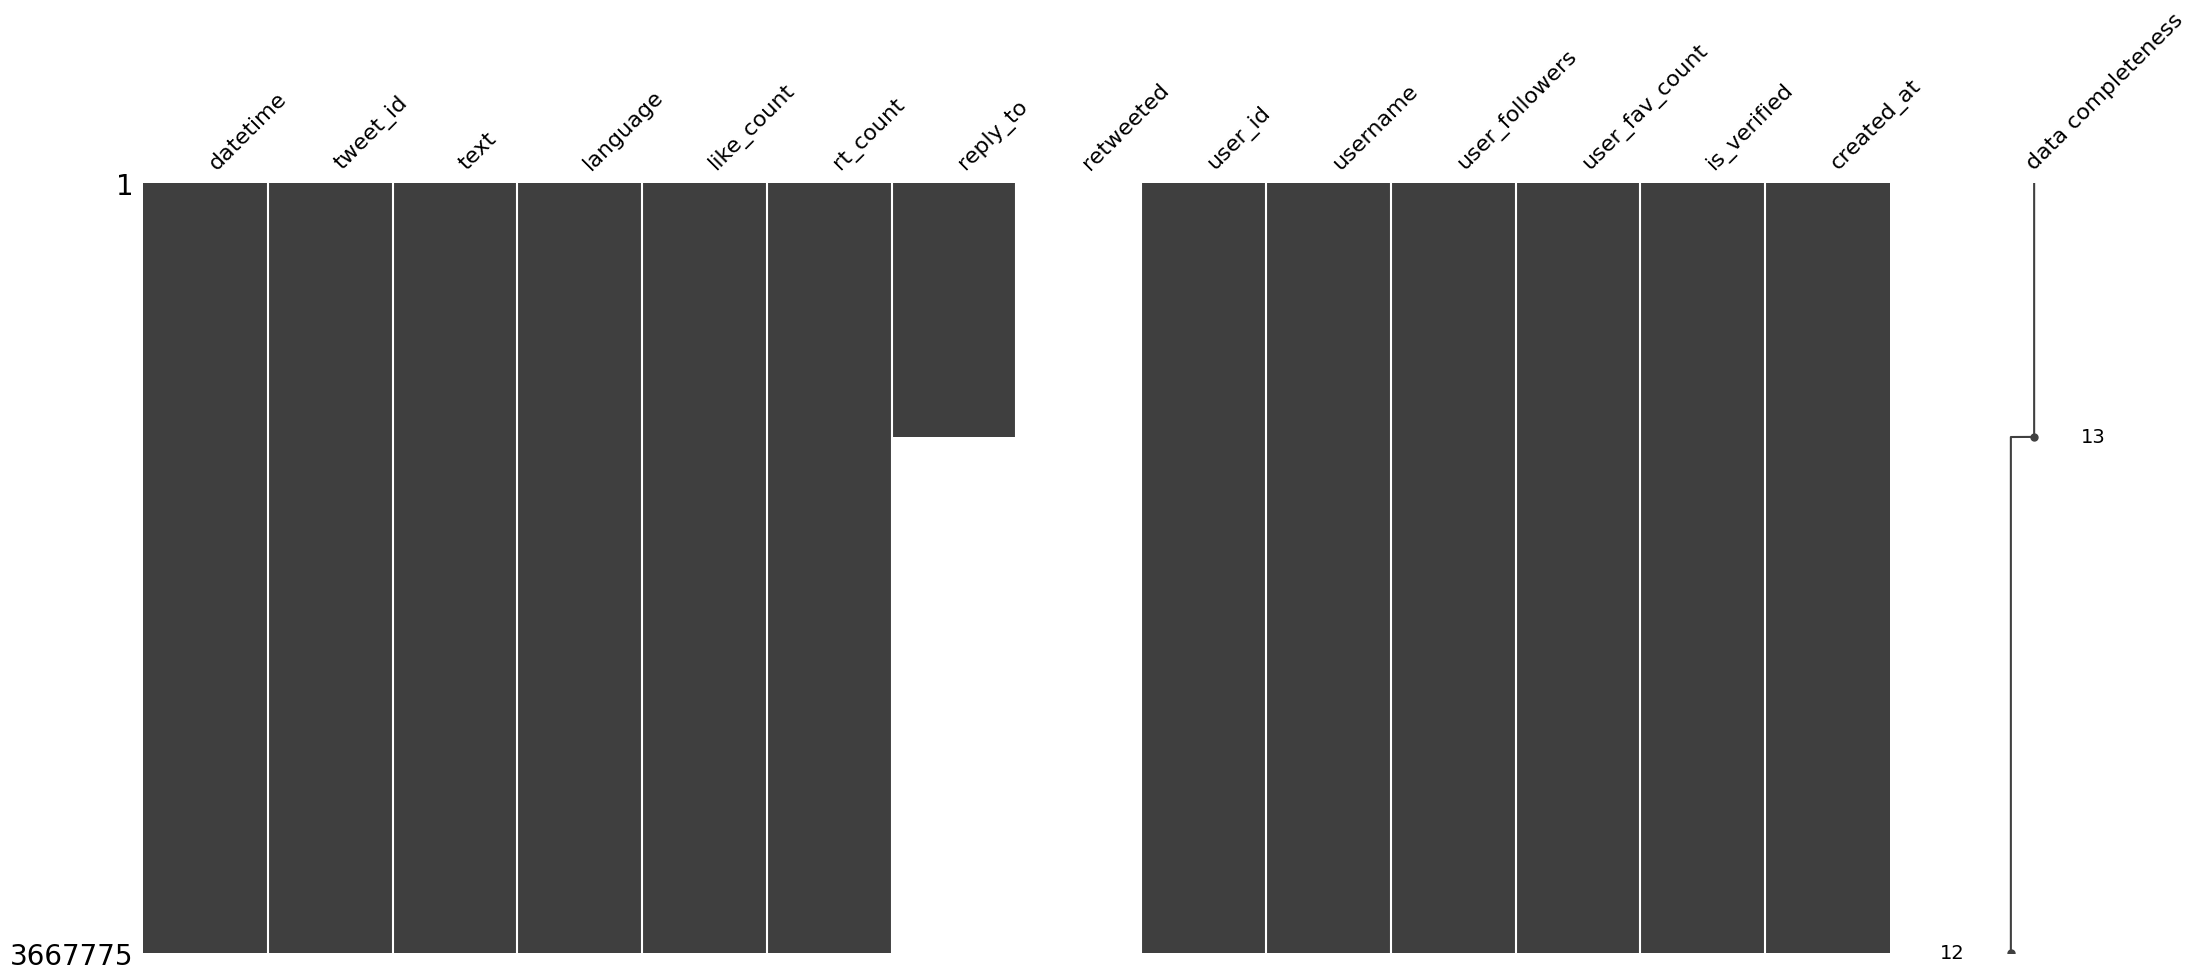

In [45]:
import missingno as msno

msno.matrix(df, labels=True, sort="descending");

### Missing values per feature

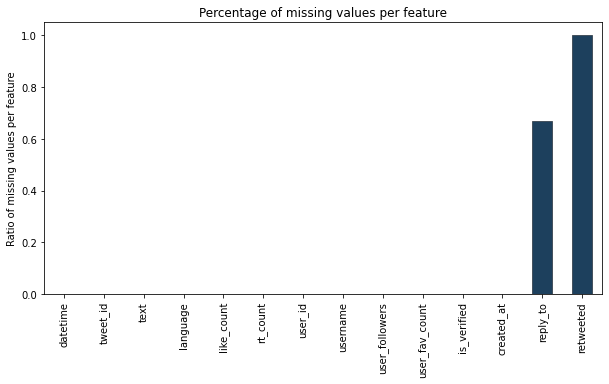

In [40]:
#identify the ratio of missing values per feature.
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(10, 5),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature",
    edgecolor='#333F4B',
    linewidth=0.8,
    color='#1d405d');

In [ ]:
df.plot(x='like_count', y='user_followers', kind='scatter', figsize=(25,10));

In [ ]:
df['tweet_id'].groupby(df['datetime'].dt.to_period('D')).count().plot(kind='bar', figsize=(25,10));

### Features Analysis

In [ ]:
df['tweet_id'].groupby(df['language']).count().plot(kind='bar', figsize=(15,10));

In [47]:
df

,datetime,tweet_id,text,language,like_count,rt_count,reply_to,retweeted,user_id,username,user_followers,user_fav_count,is_verified,created_at
0,2021-10-01 00:12:02+00:00,1443730389986590720,✨Join me this Sunday to celebrate 6 months sin...,en,17,8,NaN,NaN,358455054,BoxheadTweets,3724,13569,False,2011-08-19 23:28:07+00:00
1,2021-10-01 00:13:00+00:00,1443730633360953344,@top7ico @MXCfoundation @DeFinePlatform @YOPfi...,en,0,0,https://twitter.com/top7ico,NaN,2587108380,deenguyen0102,13,613,False,2014-06-25 08:29:47+00:00
2,2021-10-01 00:13:09+00:00,1443730669419446291,@MetaSpatial_io Good project go to the moon 🚀🚀...,en,1,0,https://twitter.com/MetaSpatial_io,NaN,1400522316686106624,alucard_aluca,12,366,False,2021-06-03 18:38:50+00:00
3,2021-10-01 00:13:18+00:00,1443730706409033728,@Metaverse_Yin I just take the hype as alpha lol,en,3,0,https://twitter.com/Metaverse_Yin,NaN,1350207215131525121,Paperhands41,868,3463,False,2021-01-15 22:24:29+00:00
4,2021-10-01 00:13:56+00:00,1443730867797565442,@Metaverse_Yin Keep it coming ! Lmao,en,4,0,https://twitter.com/Metaverse_Yin,NaN,1096134862484983808,BigLouGutter,4701,46924,False,2019-02-14 19:51:31+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667770,2022-04-26 21:33:59+00:00,1519067288191782913,🚨 Road to 500 followers 🚨\n\nATTN CHECK PINNED...,en,0,0,NaN,NaN,1444206517461323783,PirateSheckles,347,3034,False,2021-10-02 07:44:29+00:00
3667771,2022-04-26 21:33:59+00:00,1519067289227870211,"From the latest in edge, quantum, 5G, IoT, and...",en,0,0,NaN,NaN,513817591,ExpertsRock,1540,35884,False,2012-03-04 01:42:47+00:00
3667772,2022-04-26 21:34:00+00:00,1519067294135070721,Architectural Designs as NFTs in the Real Worl...,en,0,0,NaN,NaN,1468164097355264002,group_kq,15,1,False,2021-12-07 10:22:58+00:00
3667773,2022-04-26 21:34:01+00:00,1519067296890822656,@Mazyukin_ @opensea This NFT project is revolu...,en,0,0,https://twitter.com/Mazyukin_,NaN,1513945041324195843,OpenseaMonkey,29,30,False,2022-04-12 18:20:08+00:00


### First Phase Agrah-Aydin (67.024)

In [ ]:
df[(df['datetime'] >= '2021-10-21 00:00:00') & (df['datetime'] < '2021-10-28 00:00:00') & (df['language'] == 'en')].count()

# Pre-processing Tasks (TODO)

1. Join all the months worksheet in only one file - OK
2. Preprocessing Step:
   1. Remove duplicates by value id keeping the first entry instance - OK
   2. Convert datetime column as a just day date format (yyyy-mm-dd) - OK
   3. Remove non-English tweets - OK
   4. Remove all columns except text
   5. Data Manipulation
      1. Noise removal in Tweet Texts
      2. Normalization
      3. Tokenization
      4. Stemming
      5. Lemmatization
      6. Remove Stopwords
3. Apply NLP models (Textblob, VADER and Affin) for each terms
4. Verify Frequent terms (first 10) particularly in each month

* Questão? Qual fator fez o número de comentários subir tanto?--
* Buscar termos mais frequentes relacionados ao metaverso
* Infogain para verificar se há dependência entre as features

1. Oct - Metaverso - NFT | Aug ented r | ...
2. Nov - NFT | vendas | ...
3. Dez -
4.  
And/Or
1. Week 1 - a,b, c,d
2. Week 2 - ...

# Remoção de tweets de outros idiomas

In [2]:
import pandas as pd

In [ ]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [13]:
import dataframe_image as dfi

In [3]:
df = pd.read_csv("tweets_preprocessed_english.csv")

In [9]:
data = df[['datetime', 'tweet_id', 'text','language','username']]

In [11]:
table = data.head(10)

In [16]:
dfi.export(
    table,
    "table.svg",
    table_conversion="matplotlib"
)

In [35]:
df.count()[0], \
    df[df['language'] == 'en'].count()[0], \
    df[df['language'] != 'en'].count()[0]

(3667775, 3667775, 0)

In [ ]:
df.rename_axis({'tweet_id':'quantidade'})

In [34]:
df[['tweet_id']].groupby(df['language']).count().\
    sort_values(by='tweet_id', ascending=False)

,tweet_id
language,
en,3667775
pt,11114
fr,1298
es,1177
it,752
tl,578
in,532
et,514
de,493


In [37]:
df.columns

Index(['datetime', 'tweet_id', 'text', 'language', 'like_count', 'rt_count',
       'reply_to', 'retweeted', 'user_id', 'username', 'user_followers',
       'user_fav_count', 'is_verified', 'created_at'],
      dtype='object')

In [ ]:
df.reply_to.head()

In [ ]:
# get only tweets with lang english
df = df[df['language'] == 'en']

In [ ]:
# save preprocessed data

#df.to_csv(r"C:\Users\wferreira.MPAC\OneDrive\TCC II - Metaverso - Este Sim Agora Vai\workspace\twitter-EDA\tweets_preprocessing\tweets_preprocessed_english.csv")

In [9]:
df.count()

datetime          3685850
tweet_id          3685850
text              3685850
language          3685850
like_count        3685850
rt_count          3685850
reply_to          1216485
retweeted               0
user_id           3685850
username          3685850
user_followers    3685850
user_fav_count    3685850
is_verified       3685850
created_at        3685850
dtype: int64

### Abaixo são descritos os passos para a extração de dados do twitter

In [ ]:
# importa as bibliotecas
import snscrape.modules.twitter as sntwitter
import csv

# cria um arquivo onde será salvo os dados
csvFile = open('metaverse_oct.csv', 'a')
csvWriter = csv.writer(csvFile)

# palavras chaves
key_words = "(metaverse OR #metaverse OR #metaverso OR #metaverso)"

# idioma do comentário
lang = 'en'

# intervalo mês de outubro
intervalo = 'since:2021-10-01 until:2021-11-01'

# prepara a busca de tweets
query = '{} lang:{} {}'.format(key_words, lang, intervalo)

# itera sobre os tweets retornados
for tweet in sntwitter.TwitterSearchScraper(query).get_items() :
    # adiciona o registro no arquivo
    csvWriter.writerow([
        tweet.date, 
        tweet.id, 
        tweet.content, 
        tweet.lang,
        tweet.likeCount,
        tweet.retweetCount,
        tweet.inReplyToUser,
        tweet.retweetedTweet,
        tweet.user.id,
        tweet.username,
        tweet.user.followersCount, 
        tweet.user.favouritesCount, 
        tweet.user.verified,
        tweet.user.created,
    ])